In [2]:
#The average trip duration of the customer is more than that of the subscriber which indicates that a single time user tries to make the best use of his investment.


#Null Hypothesis: H0
#The mean trip duration of single time user (customer) over a week is less than or equal to the mean trip duration of the subscribers over a week.
#H0 : T(customer) <= T(subscriber)


#Alternate Hypothesis: Ha
#The mean trip duration of single time user (customer) over a week in more than the mean trip duration of the subscribers over a week
#Ha: T(customer) > T(subscriber)


#We have used a significance level (α) = 0.05/5%


In [ ]:
import os
os.getenv('PUIDATA')

In [ ]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
import json

%pylab inline

In [ ]:
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                    os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
                os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")
        
        
datestring = '201606'
getCitiBikeCSV(datestring)

In [15]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
# df is the dataframe where the content of the csv file is stored
#df['date'] = pd.to_datetime(df['starttime'])
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1470,6/1/2016 00:00:18,6/1/2016 00:24:48,380,W 4 St & 7 Ave S,40.734011,-74.002939,3236,W 42 St & Dyer Ave,40.758985,-73.993800,19859,Subscriber,1972.0,1
1,229,6/1/2016 00:00:20,6/1/2016 00:04:09,3092,Berry St & N 8 St,40.719009,-73.958525,3103,N 11 St & Wythe Ave,40.721533,-73.957824,16233,Subscriber,1967.0,1
2,344,6/1/2016 00:00:21,6/1/2016 00:06:06,449,W 52 St & 9 Ave,40.764618,-73.987895,469,Broadway & W 53 St,40.763441,-73.982681,22397,Subscriber,1989.0,1
3,1120,6/1/2016 00:00:28,6/1/2016 00:19:09,522,E 51 St & Lexington Ave,40.757148,-73.972078,401,Allen St & Rivington St,40.720196,-73.989978,16231,Subscriber,1991.0,1
4,229,6/1/2016 00:00:53,6/1/2016 00:04:42,335,Washington Pl & Broadway,40.729039,-73.994046,285,Broadway & E 14 St,40.734546,-73.990741,15400,Subscriber,1989.0,1


In [16]:
df['date'] = pd.to_datetime(df['starttime'])

In [17]:
df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender', u'date'],
      dtype='object')

In [18]:
df.drop(['starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid',
       'birth year','gender'], axis=1, inplace=True)

In [19]:
df.head()

,tripduration,usertype,date
0,1470,Subscriber,2016-06-01 00:00:18
1,229,Subscriber,2016-06-01 00:00:20
2,344,Subscriber,2016-06-01 00:00:21
3,1120,Subscriber,2016-06-01 00:00:28
4,229,Subscriber,2016-06-01 00:00:53


In [20]:
fig=pl.figure(figsize(5,5))


# ax = pl.plot(x = (df['tripduration'][df['usertype'] == '].mean()), df['usertype'].unique())
#norm_w = 1
#((df['tripduration'][df['usertype'] == 'Subscriber'].groupby([df['usertype'].dt.weekday]).count()) / norm_w).plot(kind="bar", 
#                                                                                          color='IndianRed', 
#                                                                                          alpha=0.5)

# norm_m = 1
# ax = ((df['date'][df['usertype'] == 'Customer'].groupby([df['date'].dt.weekday]).count()) / norm_m).plot(kind="bar", 
#                                                                                               alpha=0.5)


# tmp = ax.xaxis.set_ticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], fontsize=20)

In [21]:
p = df.groupby(['usertype']).mean()

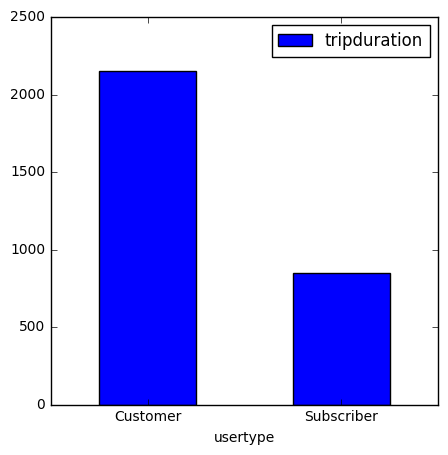

In [22]:
p.plot(kind='bar',rot=360)

In [23]:
s = df['tripduration'][df['usertype'] == 'Subscriber'].groupby([df['date'].dt.weekday ]).mean()

In [24]:
c = df['tripduration'][df['usertype'] == 'Customer'].groupby([df['date'].dt.weekday ]).mean()
s = s.to_frame()
c = c.to_frame()

In [25]:
s

,tripduration
date,
0,829.153867
1,816.969227
2,861.103150
3,819.571240
4,842.312846
5,919.327838
6,911.917002


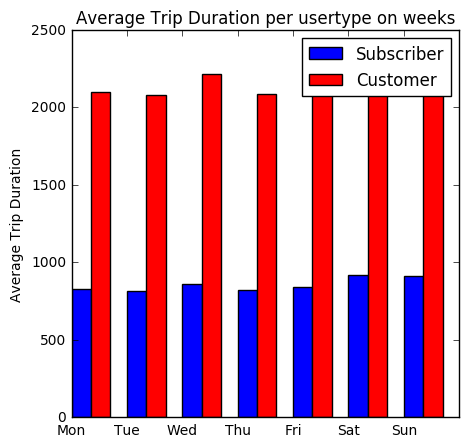

In [27]:
#fig=pl.figure(figsize(8,8))

fig, ax = pl.subplots()

#pl.xlim(0,3000)
width = 0.35  
rects1 = ax.bar( s.index.values , s.tripduration, width, color='b')
rects2 = ax.bar(c.index.values + width, c.tripduration, width, color='r')


# add some text for labels, title and axes ticks
ax.set_ylabel('Average Trip Duration')
ax.set_title('Average Trip Duration per usertype on weeks')
#ax.set_xticks(ind + width)
ax.xaxis.set_ticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], fontsize=10)

ax.legend((rects1[0], rects2[0]), ('Subscriber', 'Customer'))